In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [25]:
df = pd.read_csv('./dataset.csv')

In [26]:
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1


In [27]:
df.columns

Index(['COMMENT_ID', 'AUTHOR', 'DATE', 'CONTENT', 'VIDEO_NAME', 'CLASS'], dtype='object')

In [28]:
df.shape

(1956, 6)

In [29]:
# drop the unnecessary columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1956 entries, 0 to 1955
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   COMMENT_ID  1956 non-null   object
 1   AUTHOR      1956 non-null   object
 2   DATE        1711 non-null   object
 3   CONTENT     1956 non-null   object
 4   VIDEO_NAME  1956 non-null   object
 5   CLASS       1956 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 91.8+ KB


In [30]:
new_df = df.drop(['COMMENT_ID',"AUTHOR","DATE","VIDEO_NAME"],axis = 1)

In [31]:
new_df

,CONTENT,CLASS
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1
...,...,...
1951,I love this song because we sing it at Camp al...,0
1952,I love this song for two reasons: 1.it is abou...,0
1953,wow,0
1954,Shakira u are so wiredo,0


In [32]:
new_df.rename({"CONTENT" : 'content', 'CLASS' : 'class'},axis = 1, inplace=True)

In [33]:
new_df.head()

,content,class
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1


In [49]:
new_df.isnull().sum()

content    0
class      0
dtype: int64

In [34]:
new_df['content'][0]

'Huh, anyway check out this you[tube] channel: kobyoshi02'

In [41]:
# min length of spam comment
new_df[new_df['class'] == 1]['content'].apply(len).min()

10

In [50]:
new_df['num characters'] = new_df['content'].apply(len)

In [51]:
new_df.head()

,content,class,num characters
0,"Huh, anyway check out this you[tube] channel: ...",1,56
1,Hey guys check out my new channel and our firs...,1,166
2,just for test I have to say murdev.com,1,38
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39


In [54]:
# max length of spam comment
new_df[new_df['class'] == 1]['num characters'].min()

10

In [55]:
# max length of a comment
new_df[new_df['class'] == 1]['num characters'].max()

1200

# Text preprocessing

1. Tokenization and lower
2. Remove unnecessary words, punctuation and stopwords
3. Stemming and lemmetization
4. Vectorization

In [44]:
import nltk

In [66]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
import string

In [69]:
def text_transform(text):
    text = text.lower()

    # word tokenize
    text = word_tokenize(text)

    # remove special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()

    # remove the stopwords
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()

    # stemming
    for i in text:
        y.append(stemmer.stem(i))
    
    
    


    return " ".join(y)

In [70]:
text_transform('Huh, anyway check out this you[tube] channel: kobyoshi02')

'huh anyway check tube channel kobyoshi02'

In [71]:
new_df['transformed text'] = new_df['content'].apply(text_transform)

In [72]:
new_df.head()

,content,class,num characters,transformed text
0,"Huh, anyway check out this you[tube] channel: ...",1,56,huh anyway check tube channel kobyoshi02
1,Hey guys check out my new channel and our firs...,1,166,hey guy check new channel first vid us monkey ...
2,just for test I have to say murdev.com,1,38,test say
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48,shake sexi ass channel enjoy
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39,watch check


In [73]:
# get the length of each transformed text
new_df['ttext_len'] = new_df['transformed text'].apply(len)

In [75]:
new_df.head()

,content,class,num characters,transformed text,ttext_len
0,"Huh, anyway check out this you[tube] channel: ...",1,56,huh anyway check tube channel kobyoshi02,40
1,Hey guys check out my new channel and our firs...,1,166,hey guy check new channel first vid us monkey ...,103
2,just for test I have to say murdev.com,1,38,test say,8
3,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1,48,shake sexi ass channel enjoy,28
4,watch?v=vtaRGgvGtWQ Check this out .﻿,1,39,watch check,11


In [76]:
# Word Cloud
from wordcloud import WordCloud
wc = WordCloud(width = 500,height = 500,min_font_size = 10,background_color = 'white')

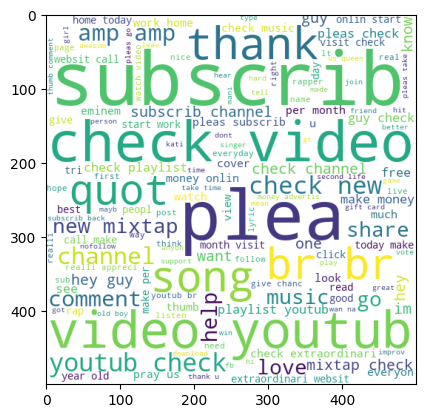

In [86]:
spam_wc = wc.generate(new_df[new_df['class'] == 1]['transformed text'].str.cat(sep =" "))
plt.imshow(spam_wc)
plt.show()

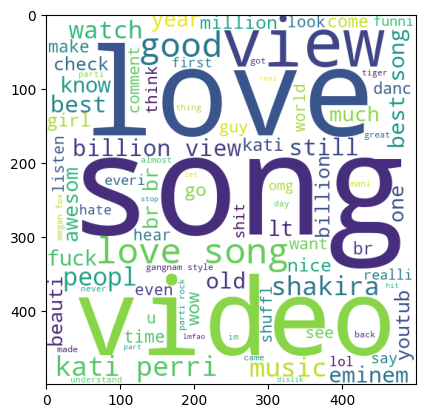

In [87]:
ham_wc = wc.generate(new_df[new_df['class'] == 0]['transformed text'].str.cat(sep =" "))
plt.imshow(spam_wc)
plt.show()

In [97]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tf = TfidfVectorizer()

In [133]:
X = tf.fit_transform(new_df['transformed text']).toarray()

In [134]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [135]:
# min max scaler
from sklearn.preprocessing import MinMaxScaler
mn  = MinMaxScaler()
X = mn.fit_transform(X)

In [136]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [137]:
X.shape

(1956, 2867)

In [138]:
y = new_df['class']

In [139]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [140]:
X_train.shape

(1369, 2867)

In [141]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()

In [142]:
regressor.fit(X_train,y_train)

LogisticRegression()

In [143]:
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [144]:
score =  accuracy_score(y_test,regressor.predict(X_test))
prec_score = precision_score(y_test,regressor.predict(X_test))

In [145]:
prec_score

0.9817518248175182

In [146]:
score

0.9216354344122658

# Naive Bayes

In [147]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
bn = BernoulliNB()
ml = MultinomialNB()
gb = GaussianNB()

In [148]:
bn.fit(X_train,y_train)

BernoulliNB()

In [149]:
score =  accuracy_score(y_test,bn.predict(X_test))
prec_score = precision_score(y_test,bn.predict(X_test))

In [150]:
score

0.8551959114139693

In [151]:
prec_score

0.9787234042553191

In [152]:
ml.fit(X_train,y_train)

MultinomialNB()

In [153]:
score =  accuracy_score(y_test,ml.predict(X_test))
prec_score = precision_score(y_test,ml.predict(X_test))

In [154]:
score

0.858603066439523

In [155]:
prec_score

0.8795986622073578

In [156]:
gb.fit(X_train,y_train)

GaussianNB()

In [157]:
score =  accuracy_score(y_test,gb.predict(X_test))
prec_score = precision_score(y_test,gb.predict(X_test))

In [158]:
score

0.7325383304940375

In [159]:
prec_score

0.8370044052863436

In [161]:
from sklearn.metrics import confusion_matrix

In [162]:
print(confusion_matrix(y_test,regressor.predict(X_test)))

[[272   5]
 [ 41 269]]


In [163]:
import pickle

In [165]:
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(regressor,open('model.pkl','wb'))